In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/housing.csv')

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(subset = ['total_bedrooms'],axis=0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

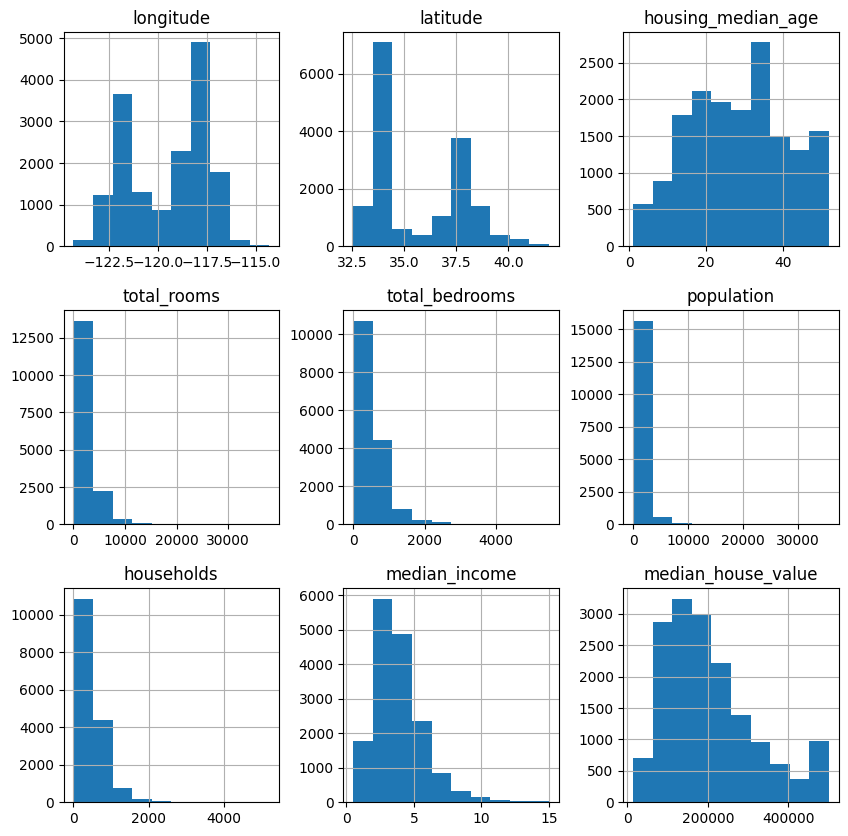

In [ ]:
train_data.hist(figsize=(10,10))

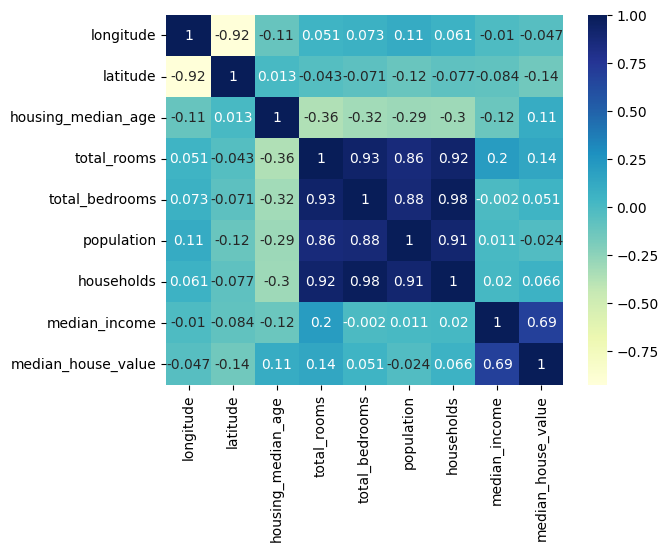

In [ ]:
train_data1 = train_data.select_dtypes(include = ['float64', 'int64'])
sns.heatmap(train_data1.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

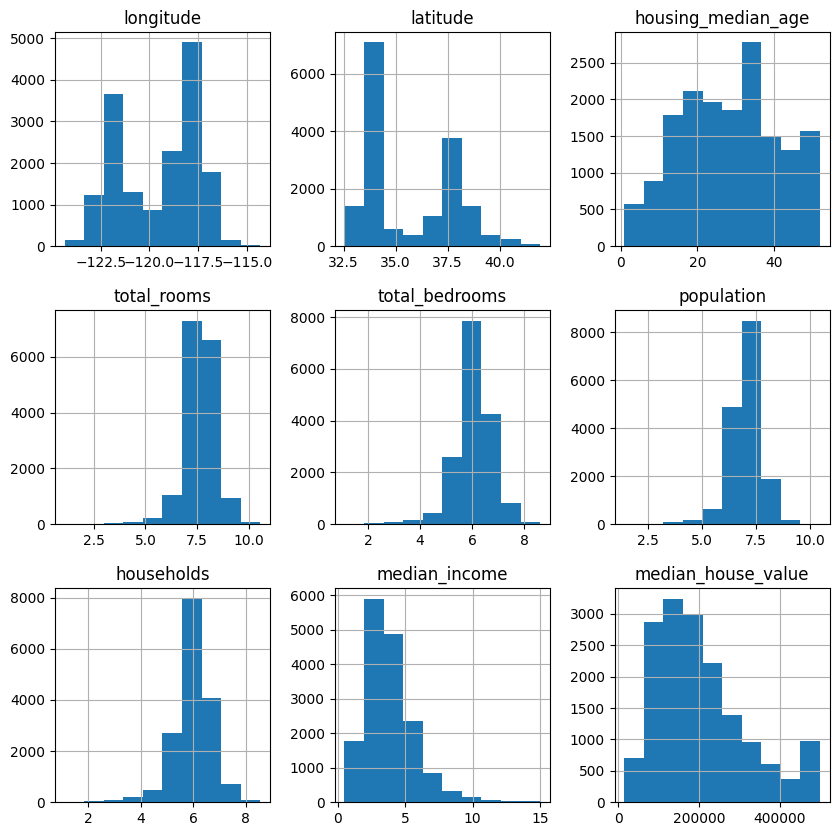

In [ ]:
train_data.hist(figsize=(10,10))

In [ ]:
train_data['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis = 1)

In [ ]:
ocean_proximity = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']
for i in ocean_proximity:
  train_data[i] = train_data[i].astype(int)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7937,-118.07,33.83,17.0,8.481151,7.063904,8.260751,7.019297,2.5978,142900.0,1,0,0,0,0
1354,-121.94,38.02,29.0,8.659734,7.065613,8.091627,7.031741,2.7907,113900.0,0,1,0,0,0
8197,-118.14,33.80,43.0,7.826842,6.276643,7.115582,6.298949,3.4211,203900.0,0,0,0,0,1
7424,-118.21,33.96,48.0,5.652489,4.653960,6.047372,4.787492,1.2826,145500.0,1,0,0,0,0
4138,-118.17,34.12,35.0,7.851272,6.511745,7.436617,6.406880,2.9154,169200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,-118.30,33.79,13.0,8.180321,6.829794,7.677864,6.781058,3.1630,224200.0,1,0,0,0,0
6889,-118.09,34.05,22.0,7.475906,5.880533,7.229839,5.897154,3.5357,199000.0,1,0,0,0,0
12726,-121.35,38.60,27.0,8.369853,6.416732,7.416378,6.356108,5.0997,170100.0,0,1,0,0,0
10431,-117.62,33.43,27.0,7.515345,6.025866,7.108244,5.934894,3.2232,247100.0,0,0,0,0,1


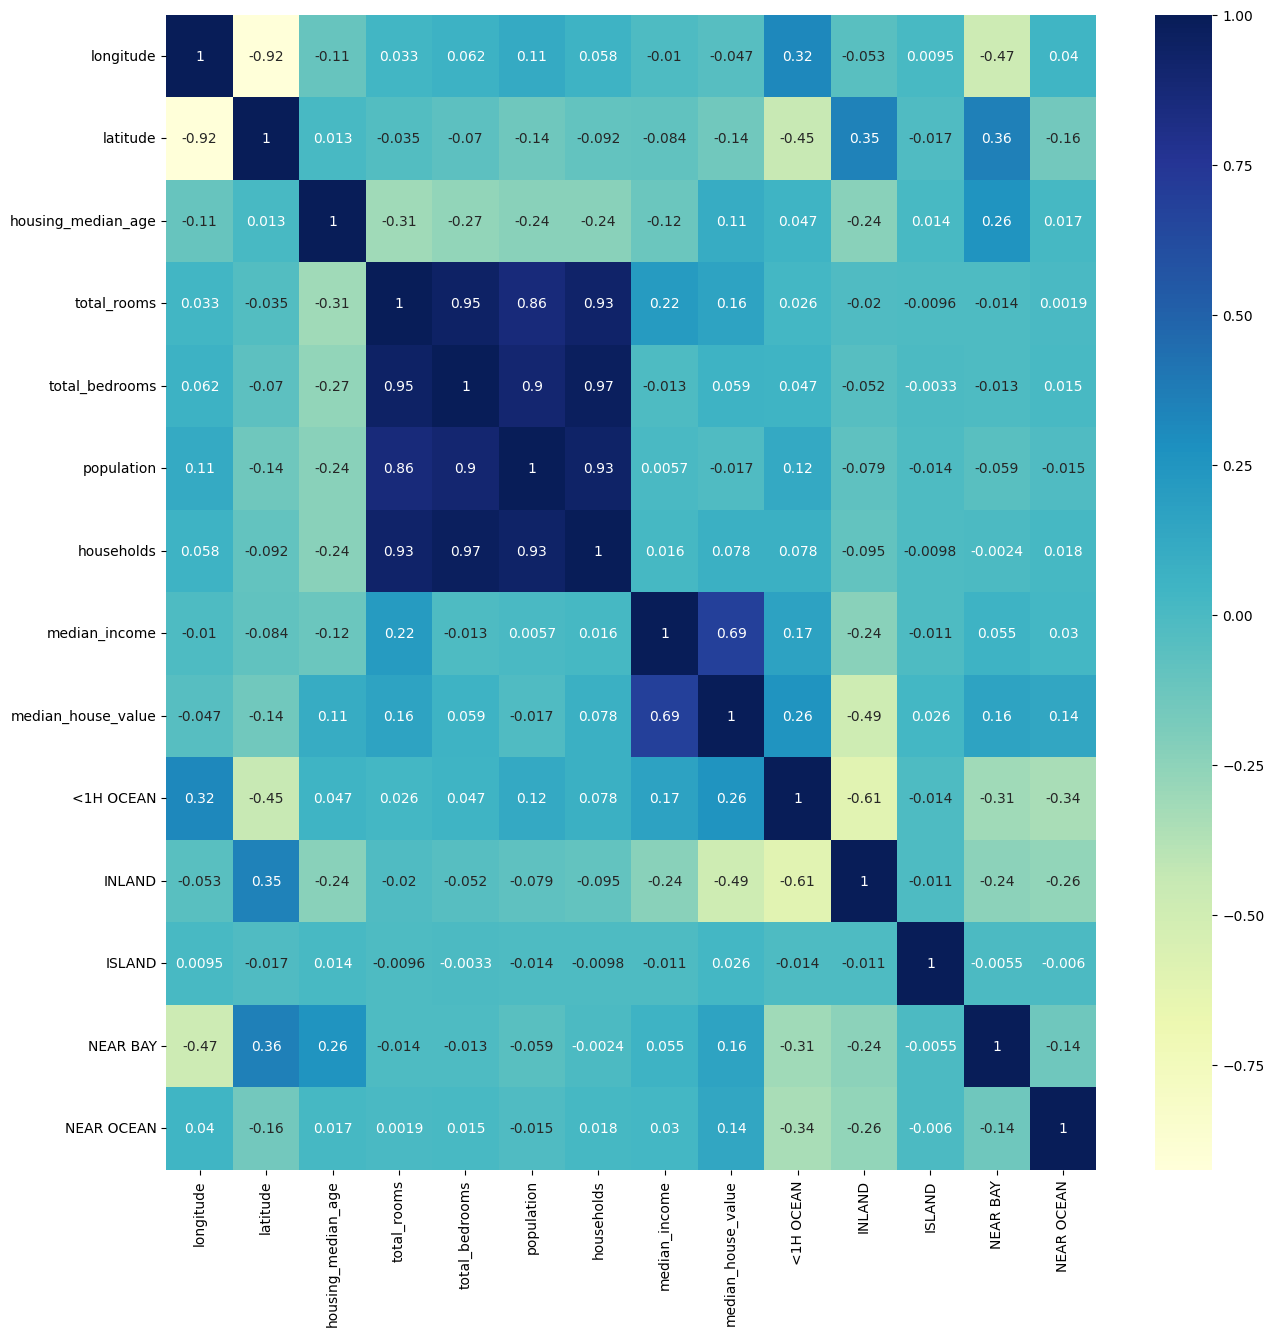

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

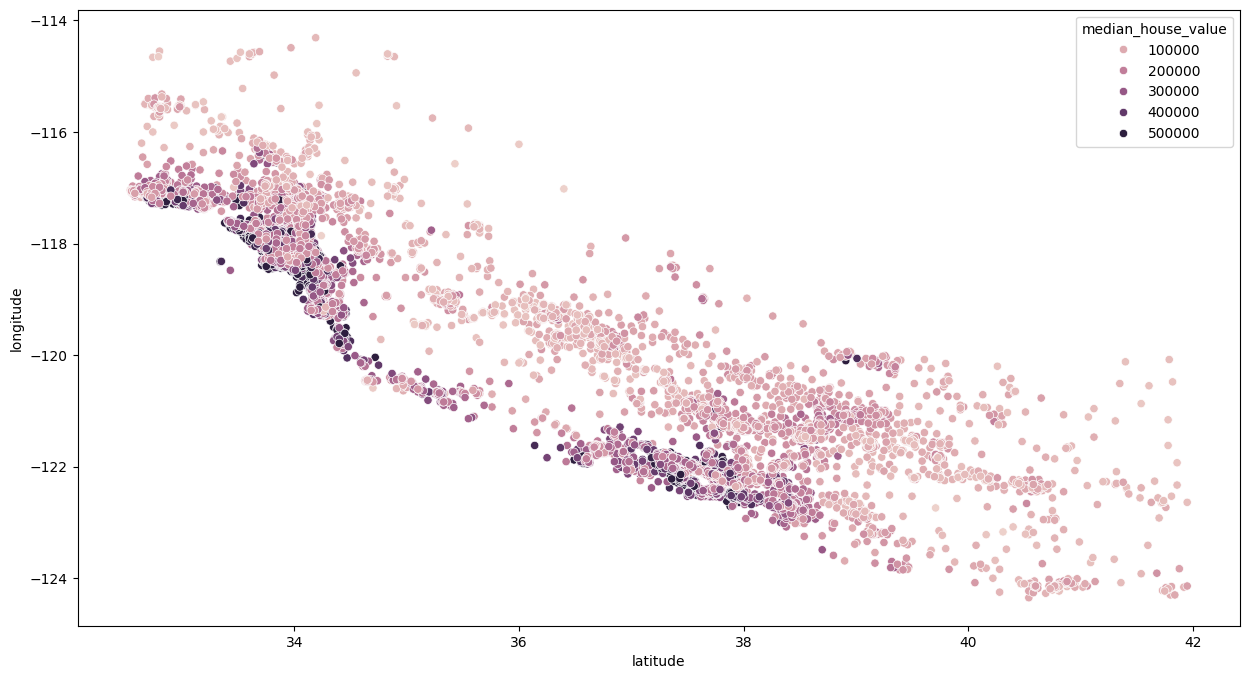

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = train_data, x = 'latitude', y = 'longitude', hue = 'median_house_value')
plt.show()

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

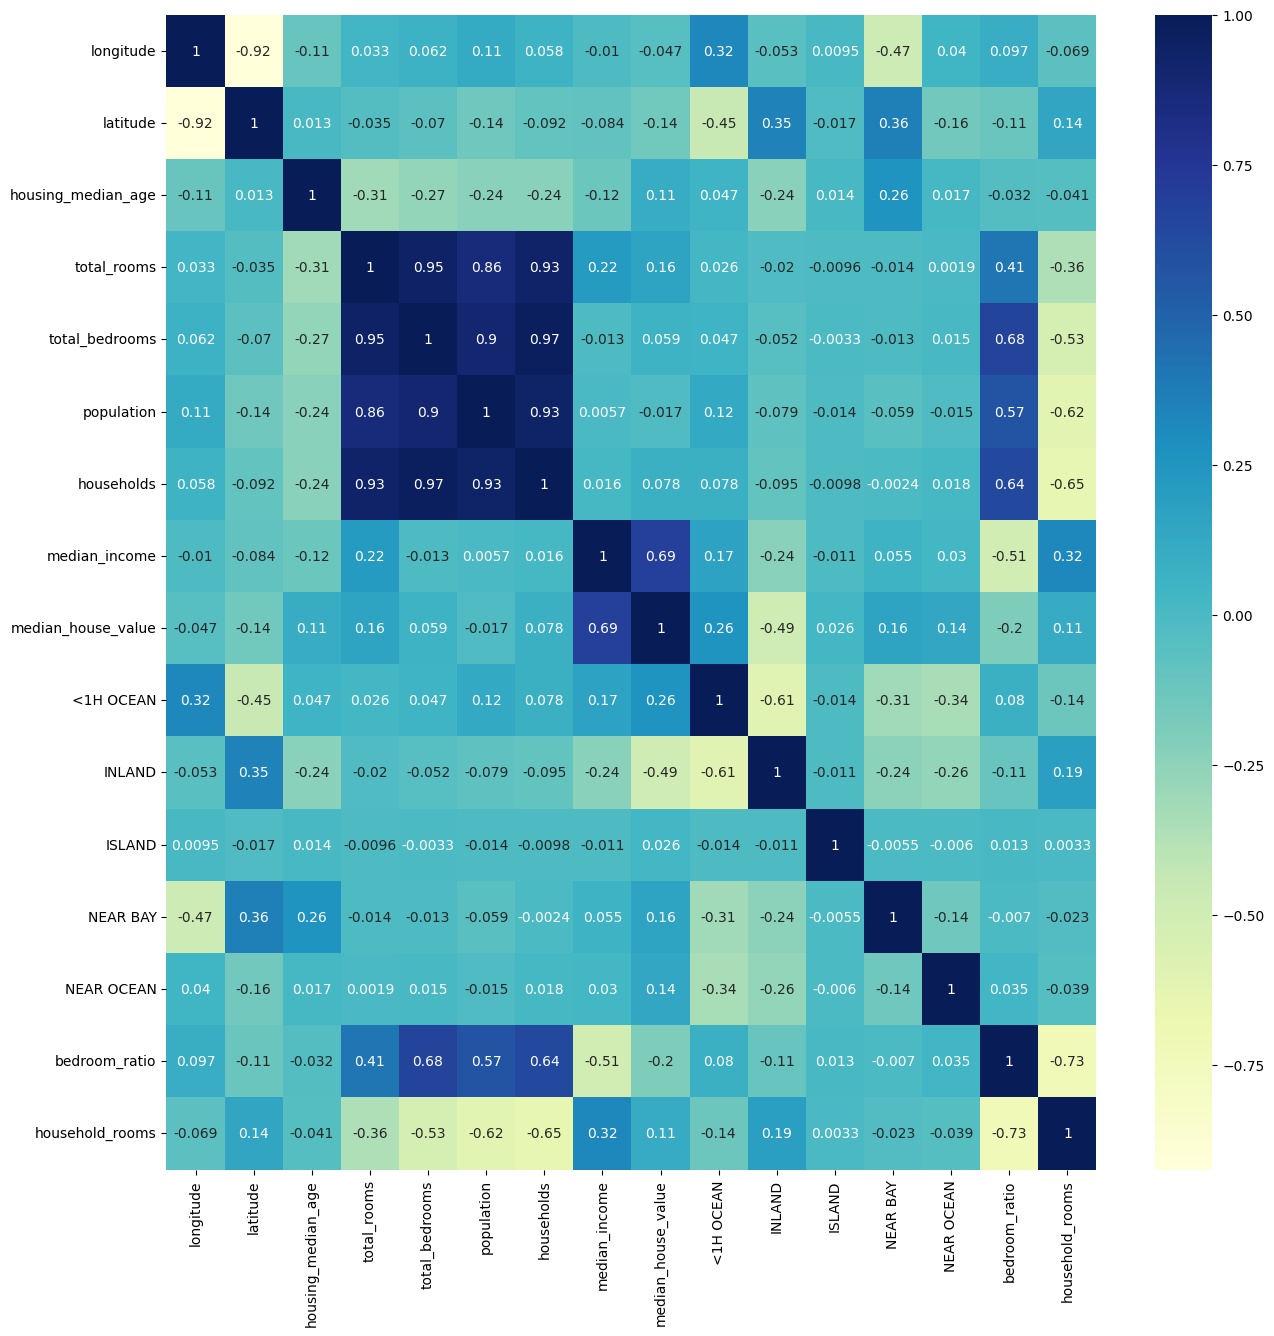

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,Y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,Y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis = 1)
ocean_proximity = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']
for i in ocean_proximity:
  test_data[i] = test_data[i].astype(int)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [ ]:
X_test,Y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8639,-118.43,33.87,41.0,6.742881,5.159055,5.843544,5.141664,6.8220,500001.0,0,0,0,0,1,0.765111,1.311420
9945,-122.39,38.37,33.0,6.972606,5.257495,6.001415,5.099866,6.8000,240800.0,1,0,0,0,0,0.754022,1.367214
18544,-122.03,36.97,52.0,6.001415,4.290459,5.303305,4.304065,1.6923,262500.0,0,0,0,0,1,0.714908,1.394360
5741,-118.25,34.17,52.0,7.334982,5.680173,6.448889,5.620401,5.1242,372900.0,1,0,0,0,0,0.774395,1.305064
2065,-119.78,36.65,27.0,7.112327,5.484797,6.561031,5.356586,2.7700,68400.0,0,1,0,0,0,0.771168,1.327772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,-118.10,34.08,21.0,7.207860,5.866468,7.080868,5.802118,2.5000,182100.0,1,0,0,0,0,0.813899,1.242281
7760,-118.14,33.91,34.0,7.606885,6.159095,6.992096,6.049733,3.0465,187800.0,1,0,0,0,0,0.809674,1.257392
16654,-120.65,35.27,52.0,7.720905,6.466145,7.121252,6.381816,2.6208,227100.0,0,0,0,0,1,0.837485,1.209829
1684,-122.31,38.01,18.0,8.324579,6.774224,7.547502,6.650279,3.2759,195000.0,0,0,0,1,0,0.813762,1.251764


In [ ]:
reg.score(X_test_s,Y_test)

0.6556508942242171

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(X_train_s,Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s,Y_test)

0.8046921419894119

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[30,50,100],
    "max_features":[8,12,20],
    "min_samples_split":[2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train_s,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,Y_test)

0.8028336009135655